In [40]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# House Price prediction Model

# understanding the data

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold
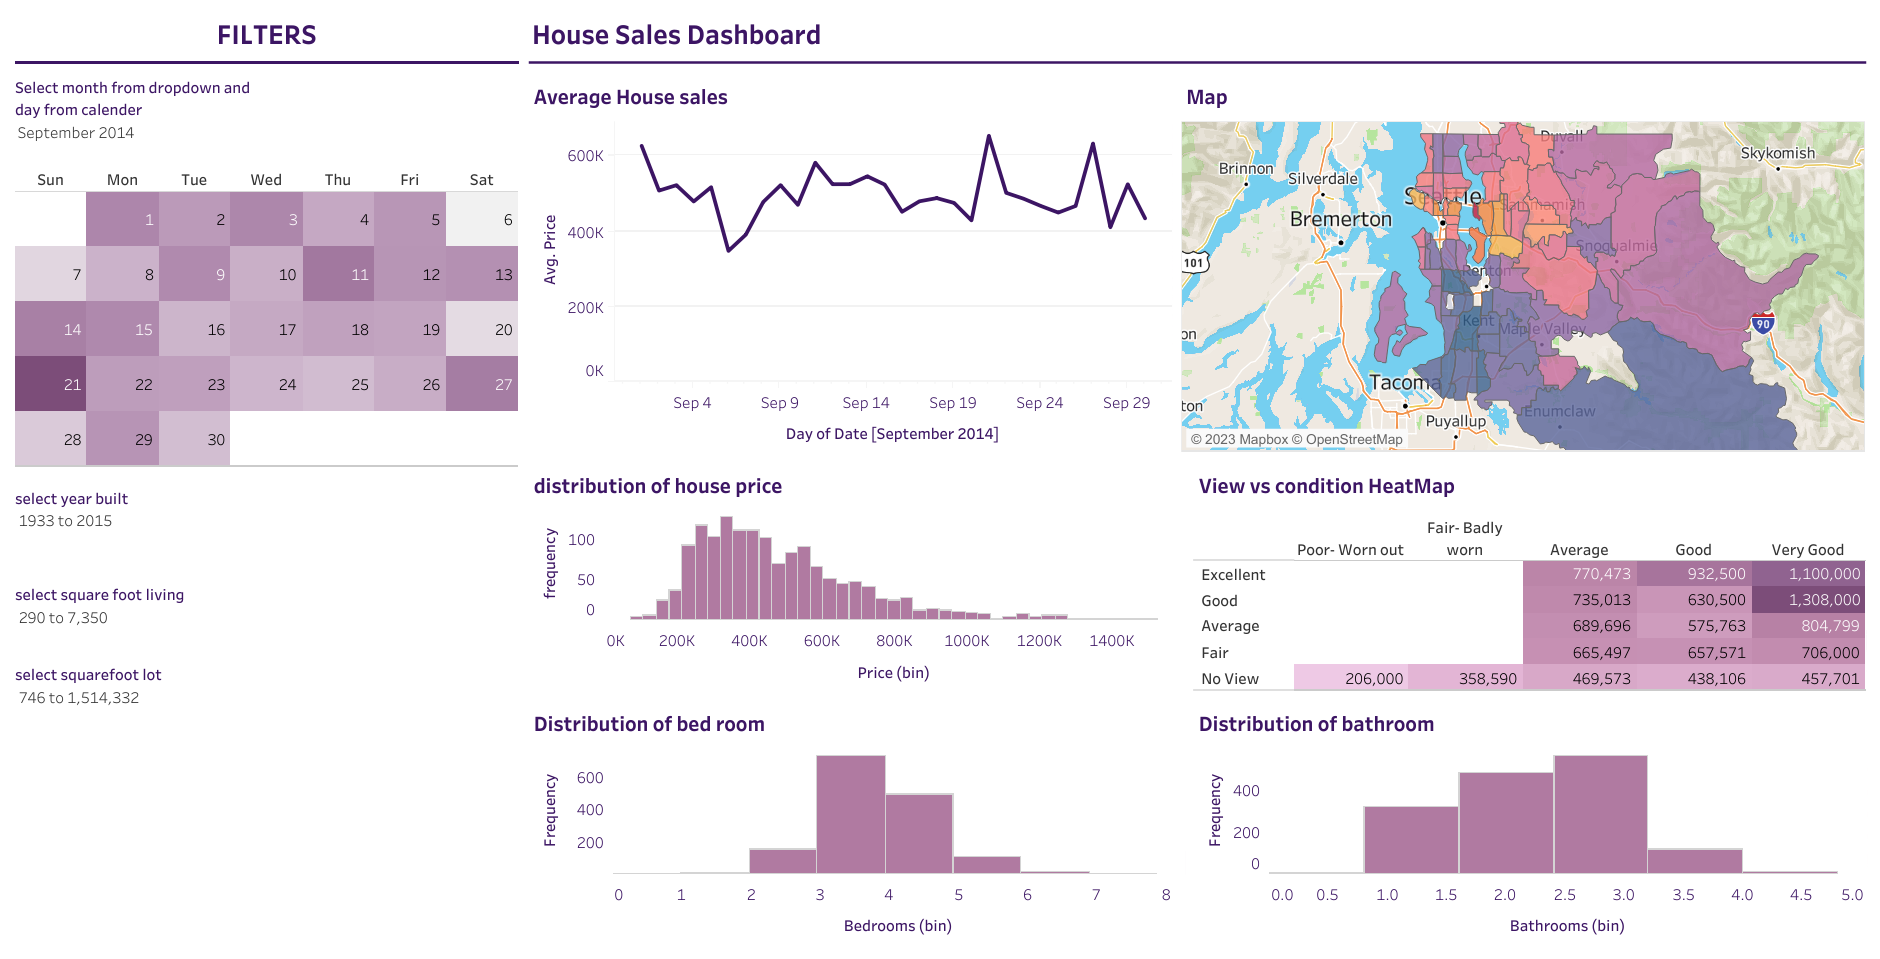.

# Import the dependencies

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
df = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# lets begin the preprocessing



*   remove unwanted columns
*   Correct the datatypes



In [43]:
df.drop(['id','date','zipcode','lat','long','sqft_living15','sqft_lot15'],inplace=True,axis=1)

In [44]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [45]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: np.int32(np.round(x)))

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [47]:
df.floors = df.floors.apply(lambda x : np.int32(np.round(x)))

In [48]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0


Lets check the correlation between the data


<Axes: >

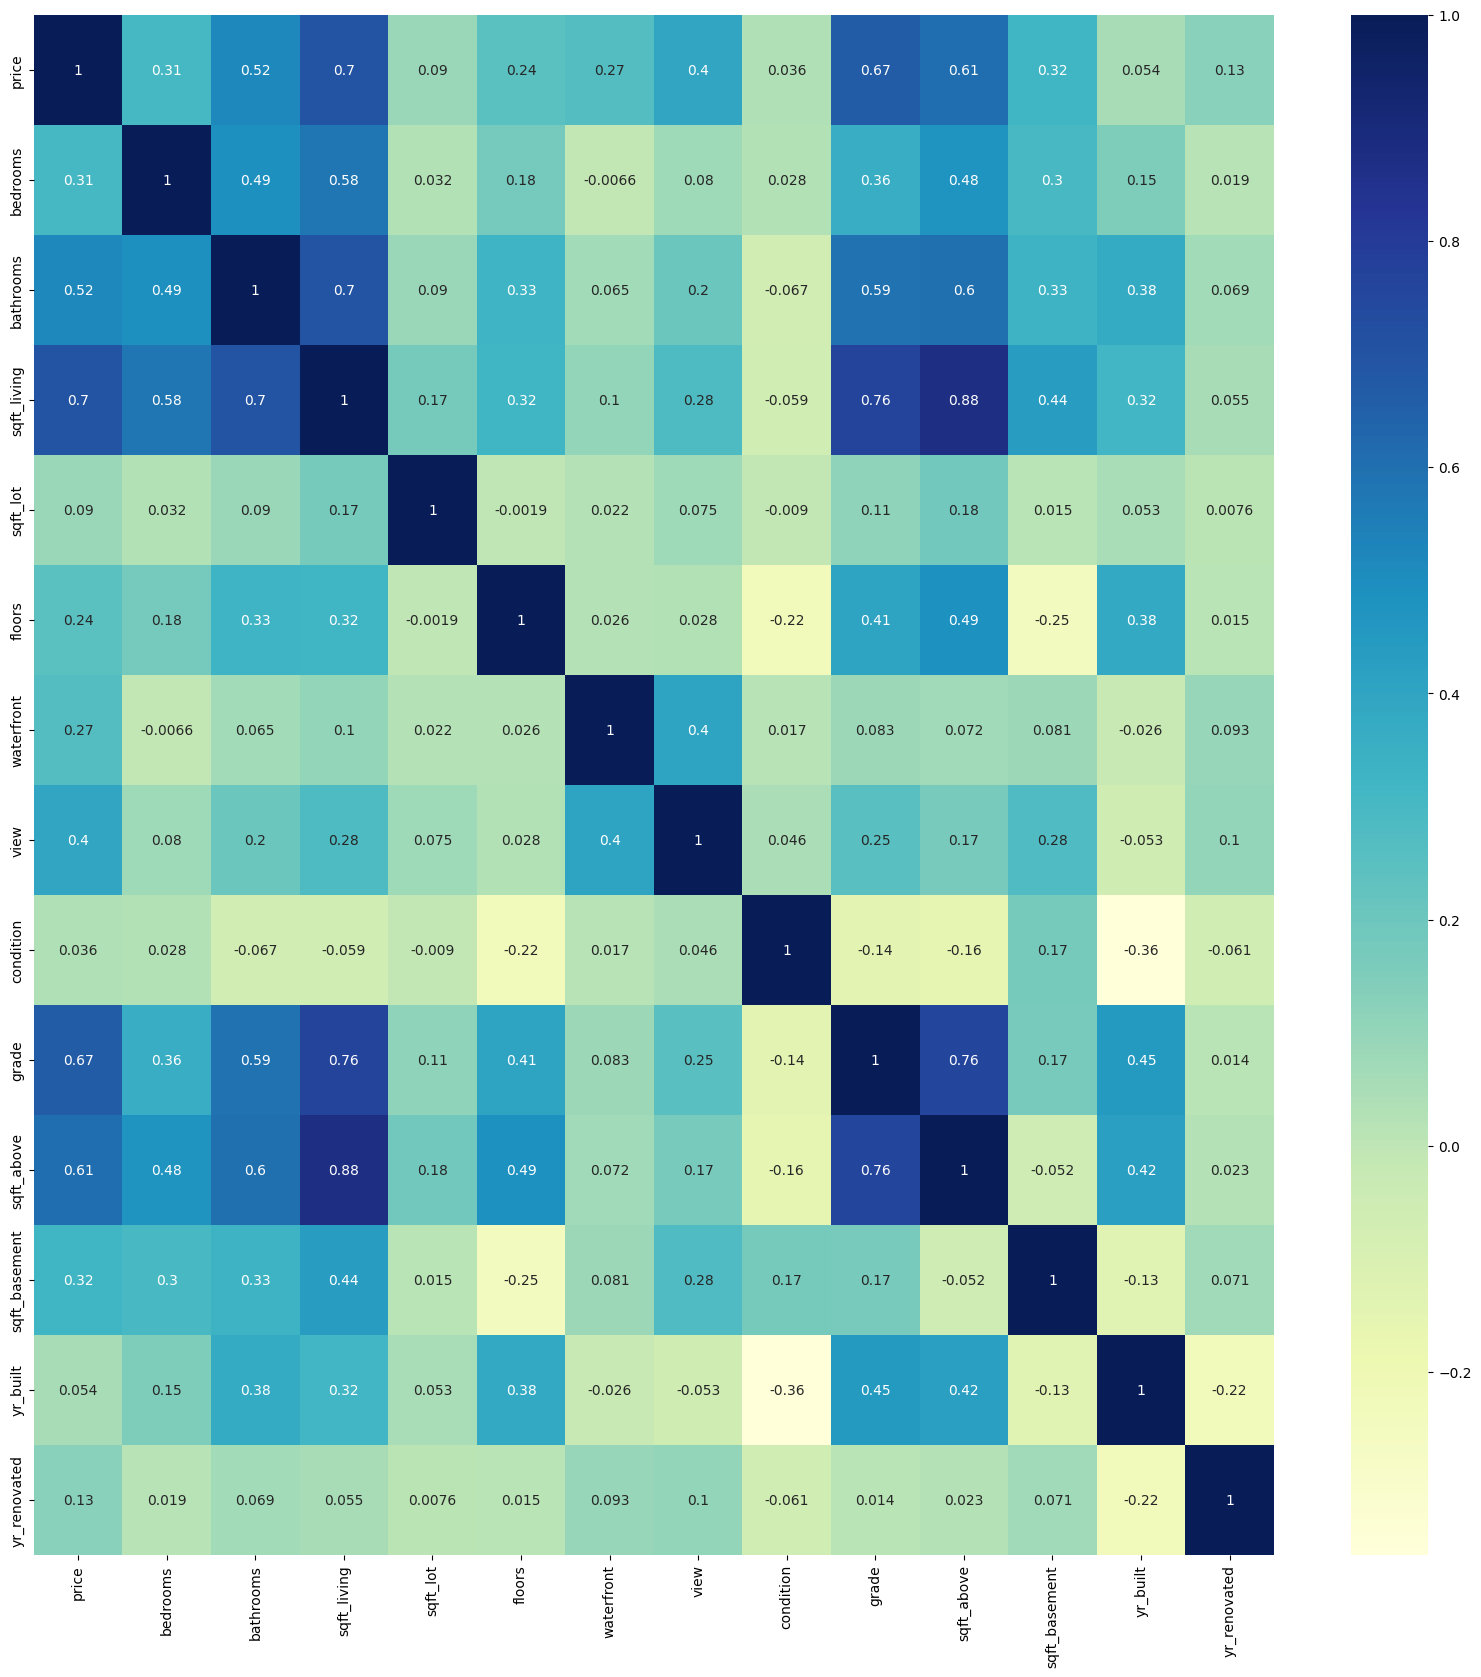

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

## Lets Preprocess More

In [50]:
df.drop(['sqft_lot'],axis=1,inplace=True)

In [51]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1,1180,1,0,0,3,7,1180,0,1955,0
1,538000.0,3,2,2570,2,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1,770,1,0,0,3,6,770,0,1933,0
3,604000.0,4,3,1960,1,0,0,5,7,1050,910,1965,0
4,510000.0,3,2,1680,1,0,0,3,8,1680,0,1987,0


<Axes: >

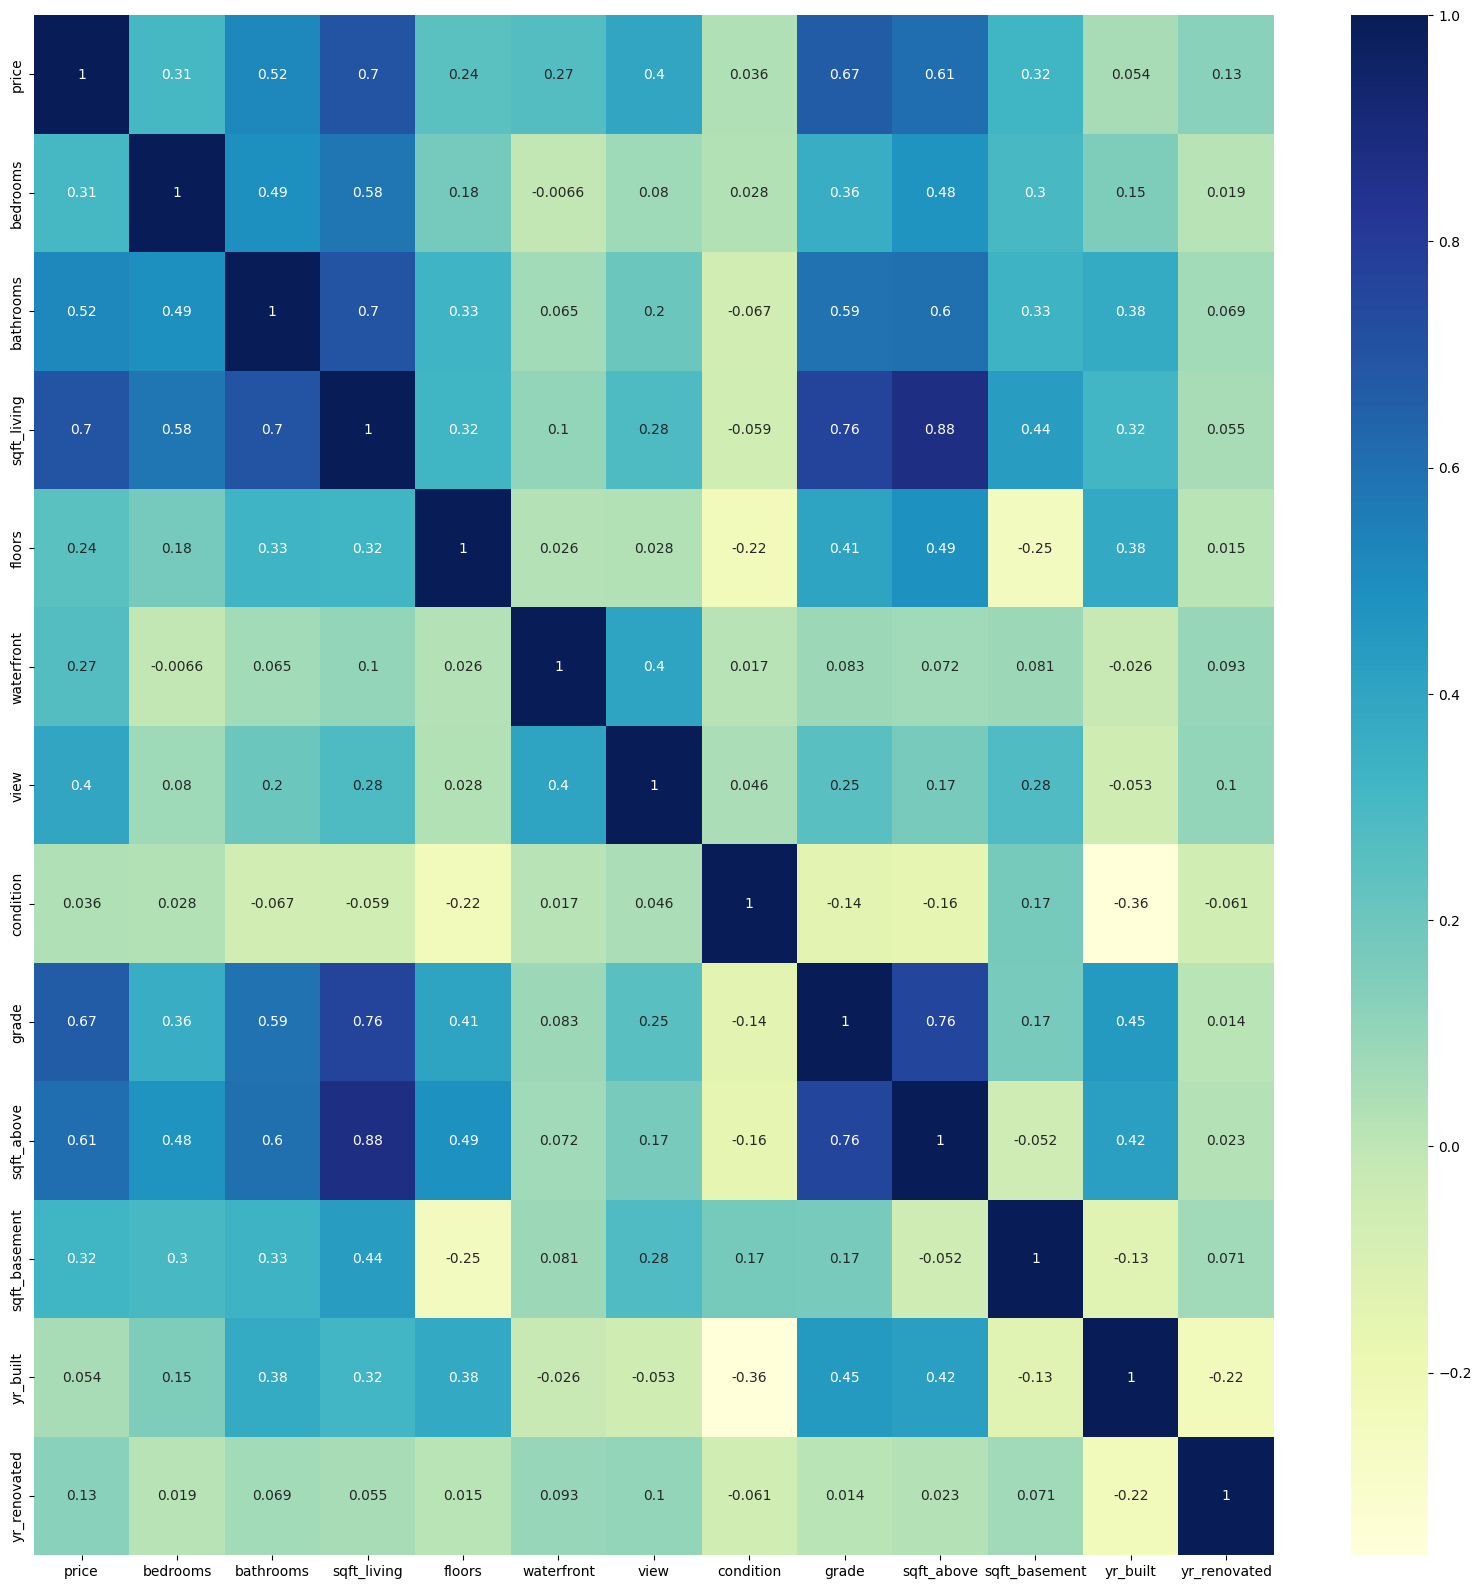

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# My Inference Based on correlation Matrix

sqft_living,batrooms,grade sqft_above have highly poitive correlation with price which means when these increases price increases. inputs like waterfront,bedrooms etc also have positive correlation. even though year_built dont have direct correlation with price. it have correlation with grade. condition have a negative correlation with grade

Adding new feature age (2014 - yearbuilt) and check if it have correlation

2014 bcause the dataset is collected in the year 2014


In [53]:
df['age'] = 2014 - df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,age
0,221900.0,3,1,1180,1,0,0,3,7,1180,0,1955,0,59
1,538000.0,3,2,2570,2,0,0,3,7,2170,400,1951,1991,63
2,180000.0,2,1,770,1,0,0,3,6,770,0,1933,0,81
3,604000.0,4,3,1960,1,0,0,5,7,1050,910,1965,0,49
4,510000.0,3,2,1680,1,0,0,3,8,1680,0,1987,0,27


<Axes: >

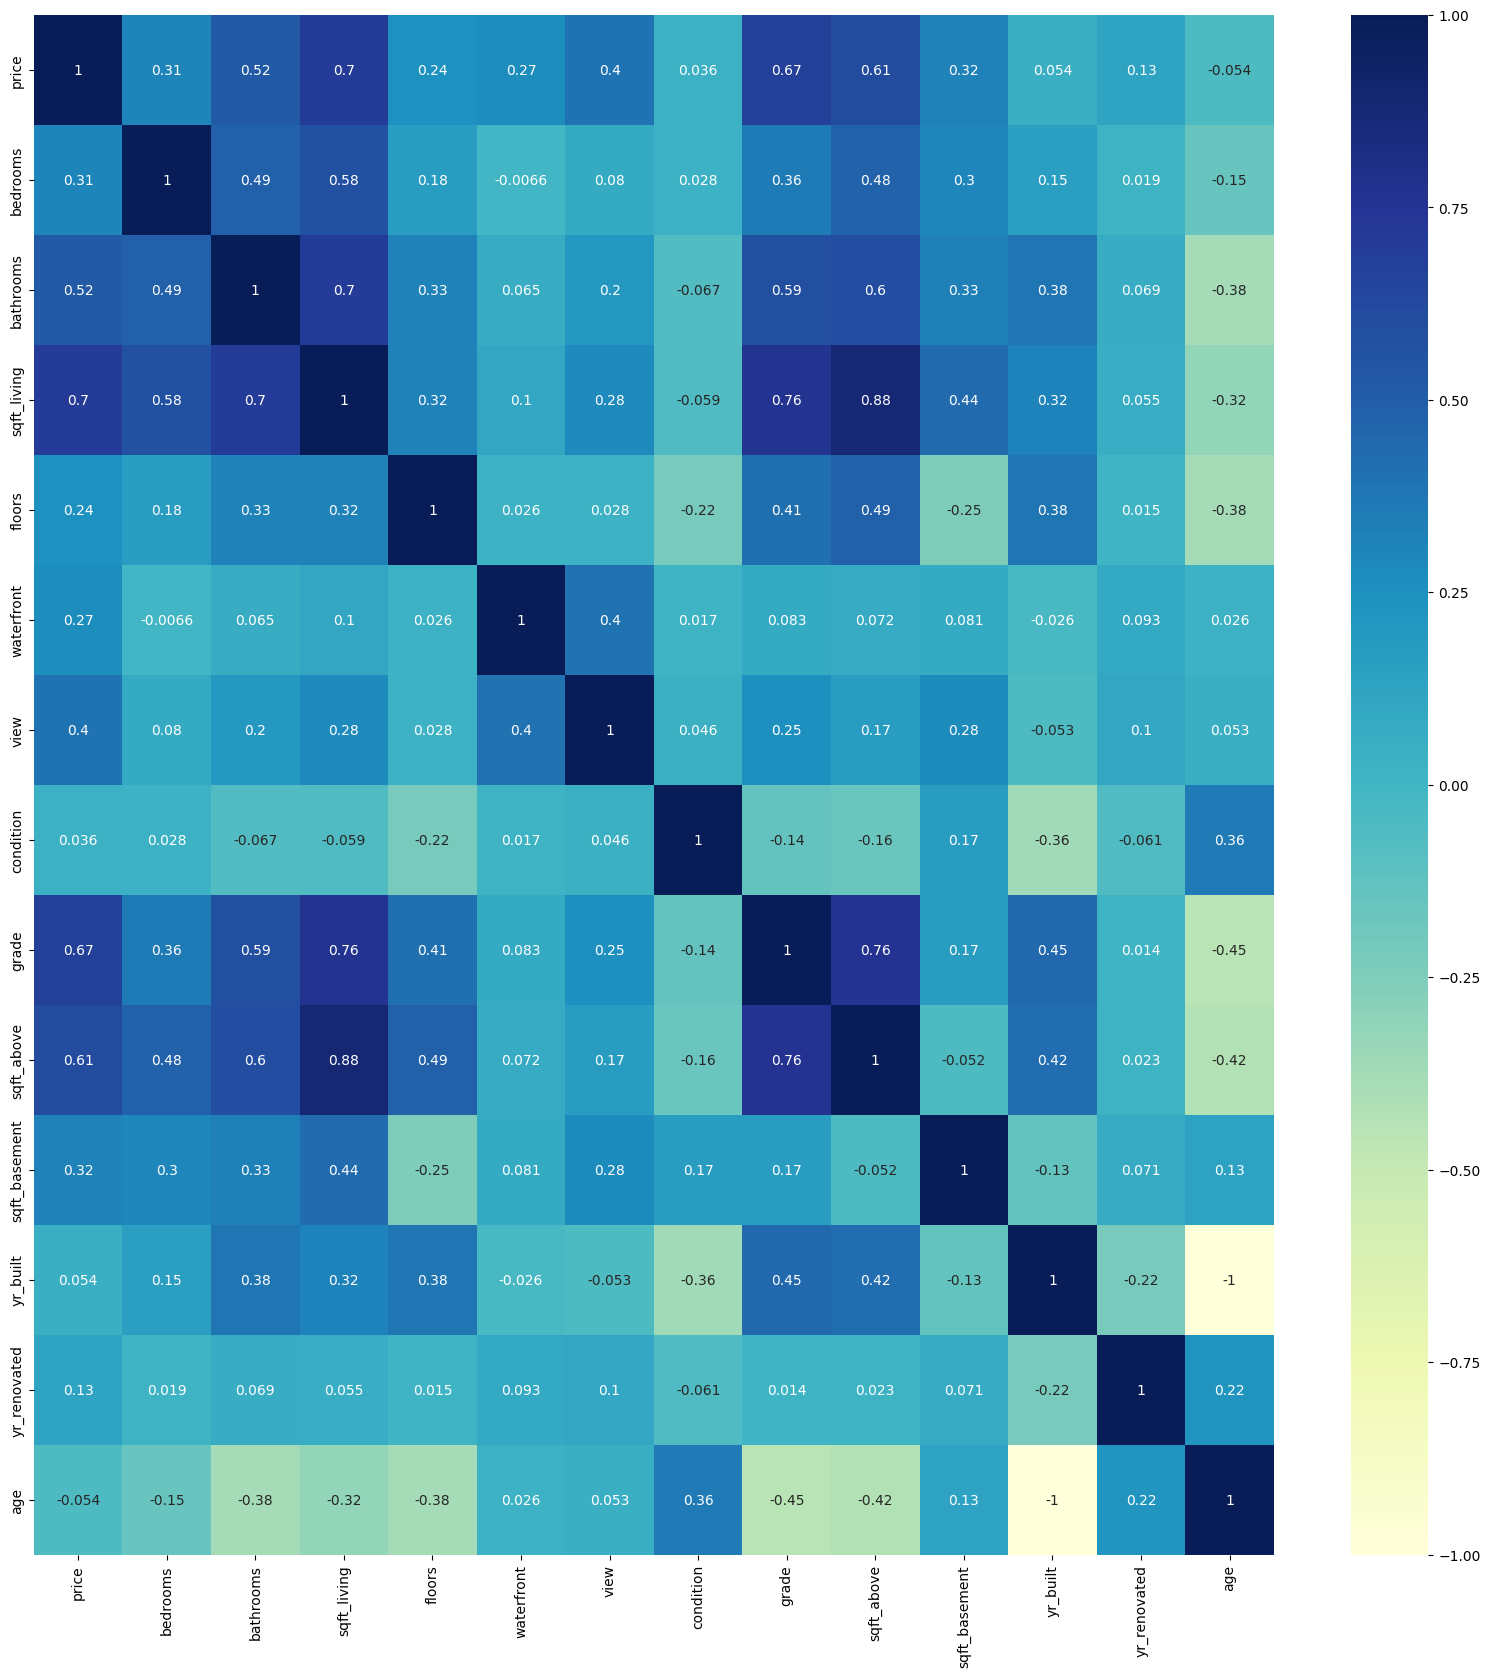

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [55]:
df.drop(['yr_built'],axis=1,inplace=True)

<Axes: >

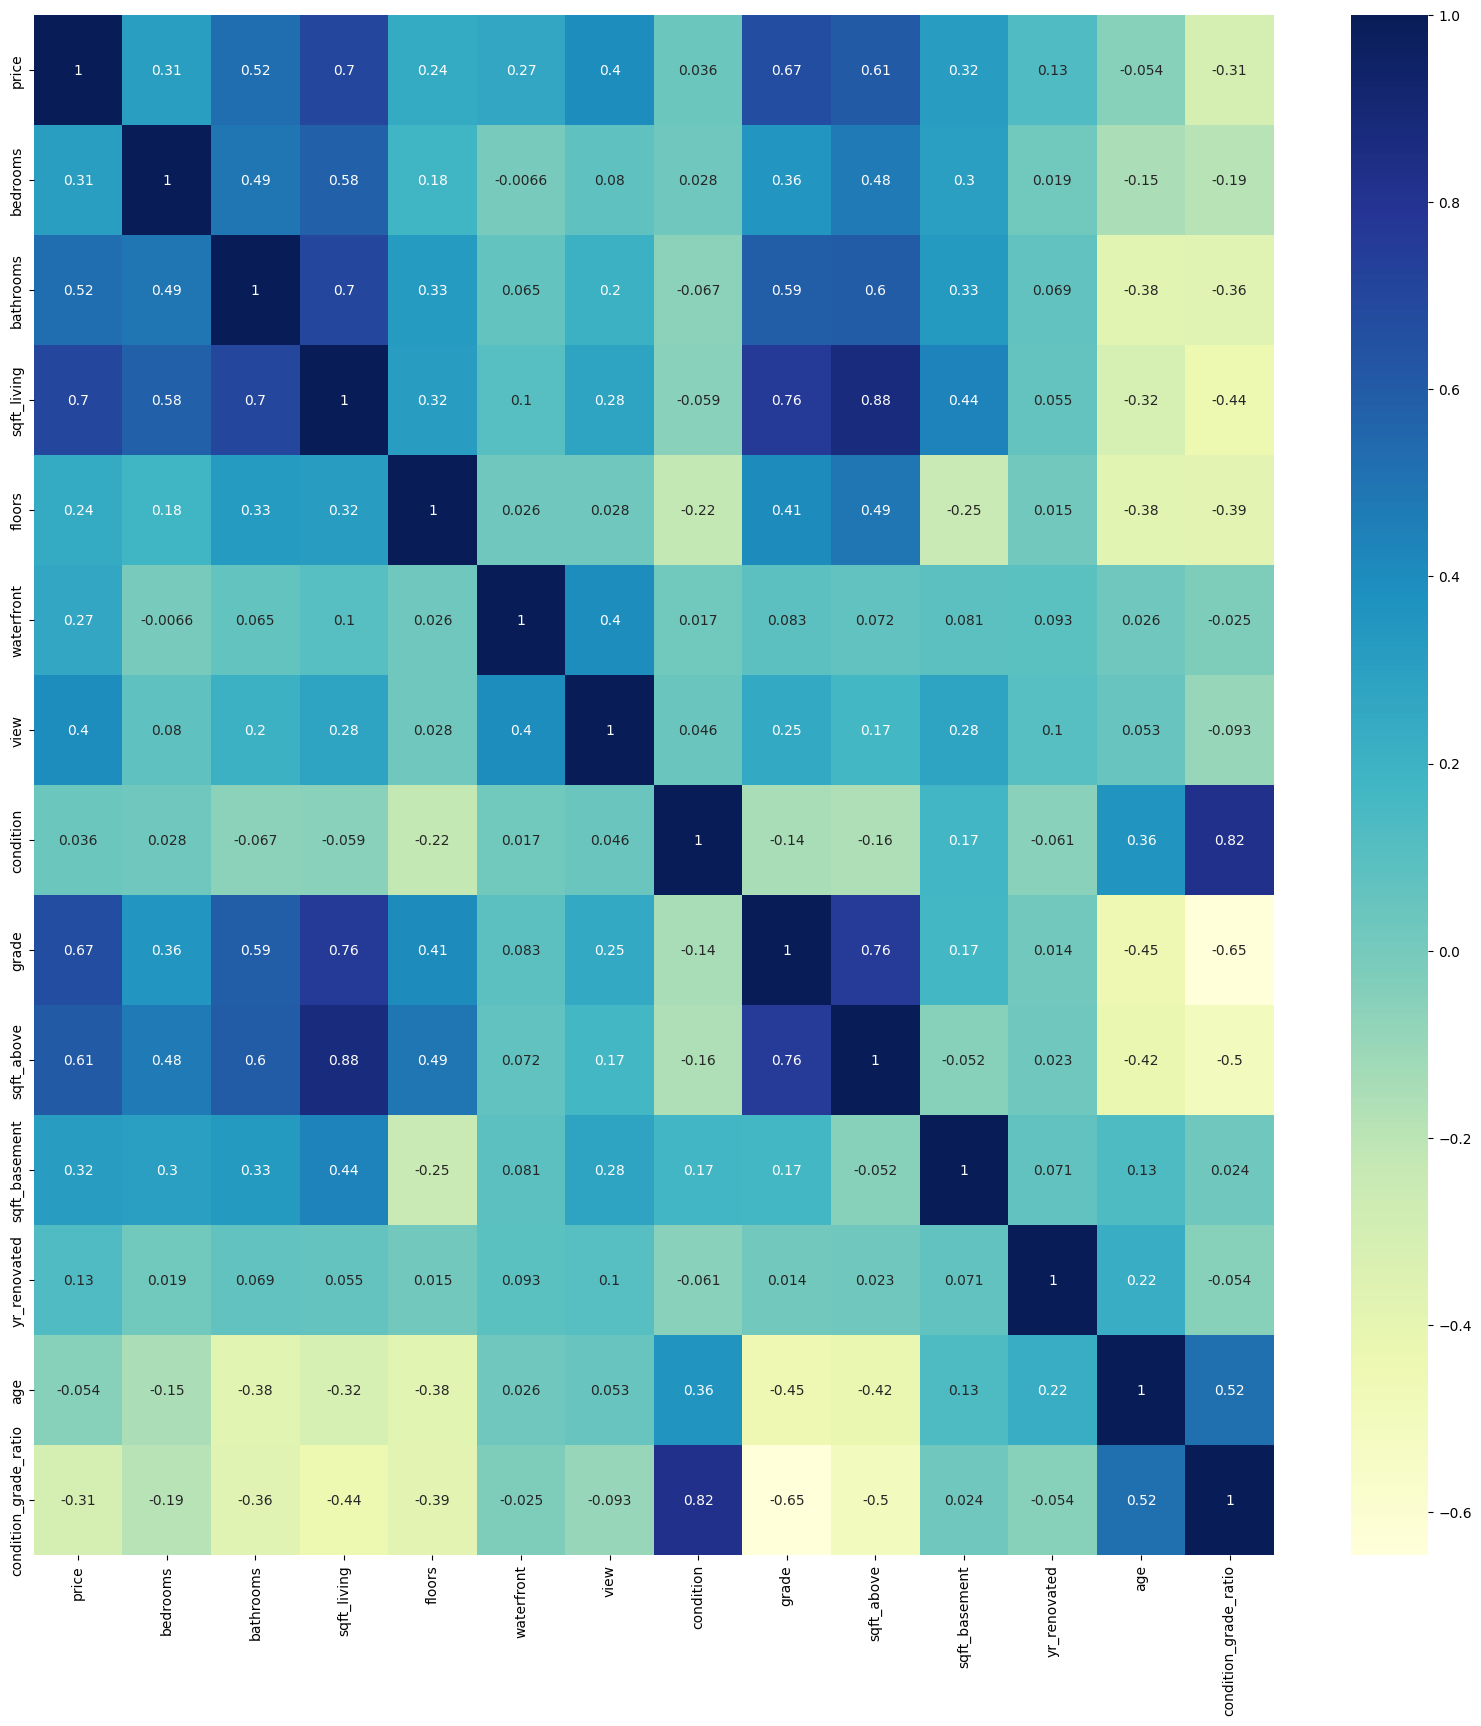

In [56]:
df['condition_grade_ratio'] = df['condition'] / df['grade']
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

Final table


In [57]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,age,condition_grade_ratio
0,221900.0,3,1,1180,1,0,0,3,7,1180,0,0,59,0.428571
1,538000.0,3,2,2570,2,0,0,3,7,2170,400,1991,63,0.428571
2,180000.0,2,1,770,1,0,0,3,6,770,0,0,81,0.500000
3,604000.0,4,3,1960,1,0,0,5,7,1050,910,0,49,0.714286
4,510000.0,3,2,1680,1,0,0,3,8,1680,0,0,27,0.375000


In [58]:
inputs = df.drop(['price'],axis=1)
outputs = df['price']

In [59]:
inputs.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,age,condition_grade_ratio
0,3,1,1180,1,0,0,3,7,1180,0,0,59,0.428571
1,3,2,2570,2,0,0,3,7,2170,400,1991,63,0.428571
2,2,1,770,1,0,0,3,6,770,0,0,81,0.500000
3,4,3,1960,1,0,0,5,7,1050,910,0,49,0.714286
4,3,2,1680,1,0,0,3,8,1680,0,0,27,0.375000


In [60]:
outputs.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [61]:
X,y = np.array(inputs),np.array(outputs).reshape(len(outputs),1)
print(X)
print(y)

[[3.00000000e+00 1.00000000e+00 1.18000000e+03 ... 0.00000000e+00
  5.90000000e+01 4.28571429e-01]
 [3.00000000e+00 2.00000000e+00 2.57000000e+03 ... 1.99100000e+03
  6.30000000e+01 4.28571429e-01]
 [2.00000000e+00 1.00000000e+00 7.70000000e+02 ... 0.00000000e+00
  8.10000000e+01 5.00000000e-01]
 ...
 [2.00000000e+00 1.00000000e+00 1.02000000e+03 ... 0.00000000e+00
  5.00000000e+00 4.28571429e-01]
 [3.00000000e+00 2.00000000e+00 1.60000000e+03 ... 0.00000000e+00
  1.00000000e+01 3.75000000e-01]
 [2.00000000e+00 1.00000000e+00 1.02000000e+03 ... 0.00000000e+00
  6.00000000e+00 4.28571429e-01]]
[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


Since every value in different scale like price in dollars and area in square feet it is better to scale all value

In [62]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

Scaled_X = x_scaler.fit_transform(X)
Scaled_y = y_scaler.fit_transform(y)
print(Scaled_X)
print(Scaled_y)

[[0.09090909 0.125      0.06716981 ... 0.         0.52173913 0.1969112 ]
 [0.09090909 0.25       0.17207547 ... 0.98808933 0.55652174 0.1969112 ]
 [0.06060606 0.125      0.03622642 ... 0.         0.71304348 0.24324324]
 ...
 [0.06060606 0.125      0.05509434 ... 0.         0.05217391 0.1969112 ]
 [0.09090909 0.25       0.09886792 ... 0.         0.09565217 0.16216216]
 [0.06060606 0.125      0.05509434 ... 0.         0.06086957 0.1969112 ]]
[[0.01926557]
 [0.06072131]
 [0.01377049]
 ...
 [0.04289849]
 [0.04262295]
 [0.03278689]]


Splitting dataset into train and test

In [63]:
Xtrain,Xtest,ytrain,ytest = train_test_split(Scaled_X,Scaled_y,test_size=0.2)

Initializing the model

In [64]:
model = LinearRegression()

Model training

In [65]:
model.fit(Xtrain,ytrain)

LinearRegression()

Lets predict some

In [66]:
y_pred = model.predict(Xtest)

calculating MSE(Mean Squared Error)

In [67]:
mse = mean_squared_error(ytest, y_pred)
print(f'Mse error: {mse}')

Mse error: 0.0008645230009395695


In [68]:
mae = mean_absolute_error(ytest, y_pred)
print(f'Mae error: {mae}')

Mae error: 0.0187639977322055


VIsualize,Visualize,Visualize

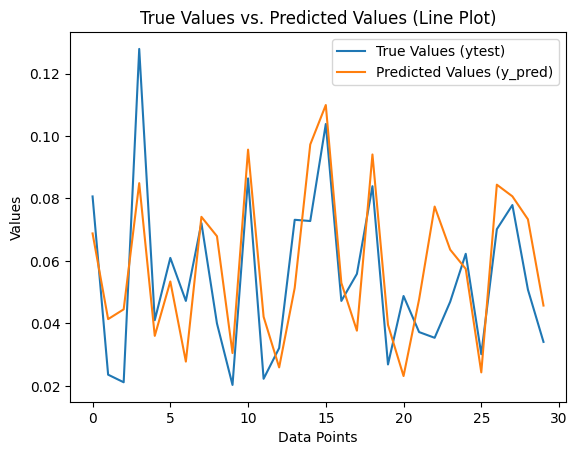

In [69]:
plt.plot(np.arange(30), ytest[:30], label='True Values (ytest)')
plt.plot(np.arange(30), y_pred[:30], label='Predicted Values (y_pred)')
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("True Values vs. Predicted Values (Line Plot)")
plt.legend()
plt.show()

# Deep learning

Deep learning is a subset of machine learning, which is a broader field of artificial intelligence (AI). It involves the use of neural networks with multiple layers (deep neural networks) to learn and make intelligent decisions from data. Deep learning algorithms attempt to simulate the way the human brain works by processing data through layers of artificial neural networks

# A sample neural network
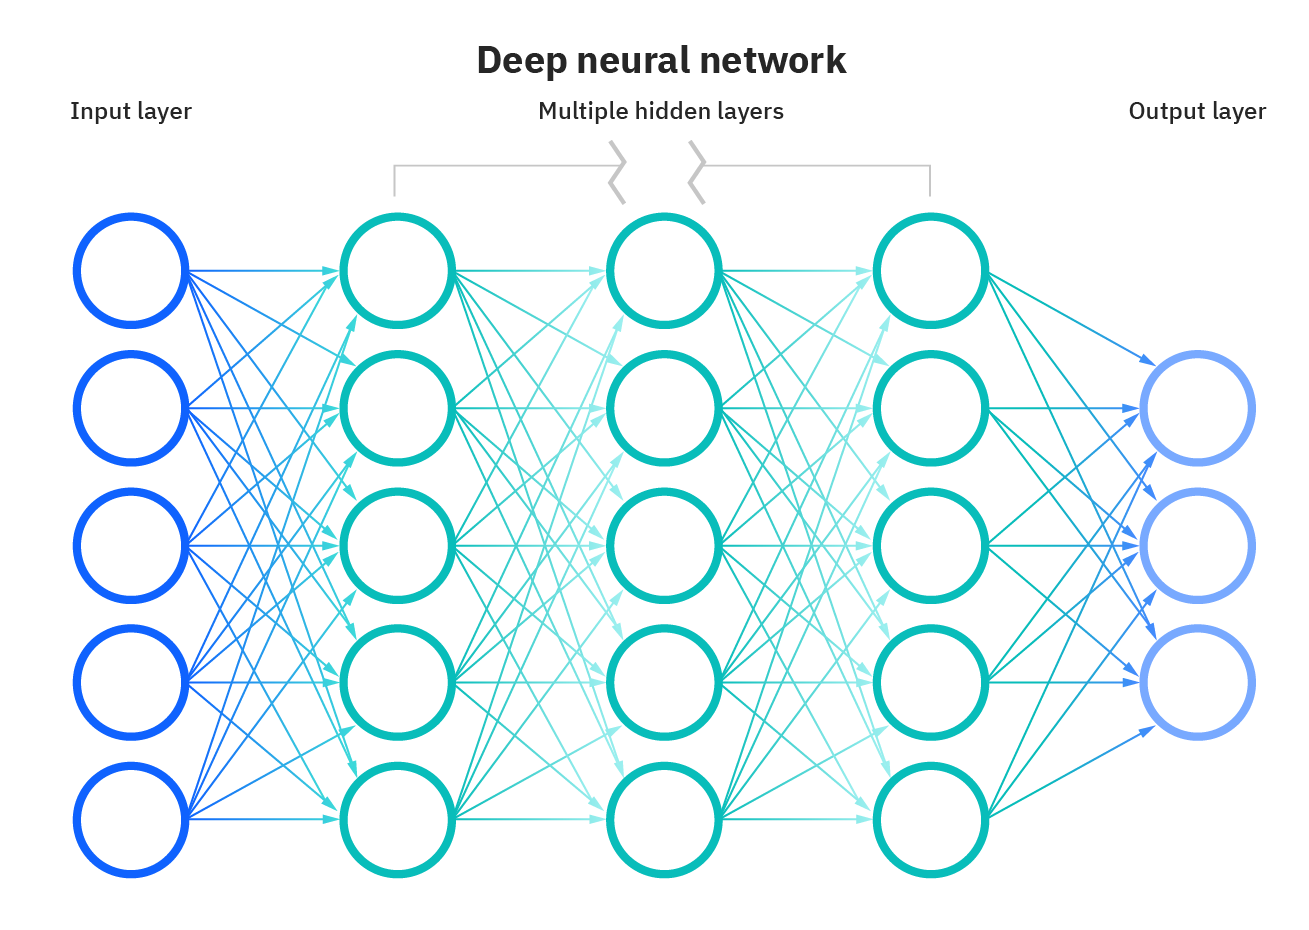

Import the modules. I am using here is pytorch

# Pytorch:
PyTorch is an open-source machine learning library for Python that provides a flexible and dynamic computational graph, which is particularly well-suited for deep learning tasks. It was developed by Facebook's AI Research lab (FAIR) and is widely used for building and training deep neural networks

In [70]:
import torch
import torch.nn as nn

We have already created train split and test split. But we need to change the datatype because pytorch works on tensor.
# tensors:
a tensor is a multi-dimensional array, similar to a NumPy array. Tensors can be used to represent and perform operations on data in the context of deep learning and other numerical computing tasks. Tensors are the fundamental building blocks of PyTorch and are used to model input data, weights in neural networks, and other intermediate values in computations

In [72]:
Xtrain,Xtest,ytrain,ytest = torch.tensor(Xtrain,dtype=torch.float32),torch.tensor(Xtest,dtype=torch.float32),torch.tensor(ytrain,dtype=torch.float32),torch.tensor(ytest,dtype=torch.float32)
print(Xtrain.dtype)

torch.float32


# Lets Build a model

In [138]:
class HOUSEPRICEMODEl(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(
            in_features=13,
            out_features=32
        )
        self.linear_layer2 = nn.Linear(
            in_features=32,
            out_features= 1
        )
        self.relu = nn.ReLU()
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer2( self.relu(self.linear_layer1(x)))

lets Initialize the model

In [139]:
model1 = HOUSEPRICEMODEl()

Here we will need a loss function and optimizer.

# Loss Function:
Definition:

The loss function, also known as the cost function or objective function, measures the difference between the predicted output of a model and the actual target values. It quantifies how well (or poorly) the model is performing on a particular task.
Objective:

The goal during training is to minimize the value of the loss function. Minimizing the loss means that the model's predictions are getting closer to the true values, and the model is improving its ability to generalize to unseen data.
Types of Loss Functions:

# Optimizers:
Definition:

The optimizer is responsible for updating the model's parameters during training to minimize the loss. It adjusts the weights and biases based on the gradients of the loss with respect to these parameters

We will be using MSELoss function and adam optimizers
# MSELoss (Mean Squared Error Loss):
Definition:

MSELoss is a commonly used loss function in regression problems. It computes the mean squared difference between the predicted and target values.

# Use Case:
MSELoss is suitable for regression problems where the goal is to minimize the squared differences between predicted and true values. It penalizes large errors more heavily than smaller ones.


# Adam Optimizer:
Definition:

The Adam optimizer is an adaptive learning rate optimization algorithm that combines ideas from two other popular optimizers, RMSprop and momentum. It is well-suited for training deep neural networks.
Key Features:

Adaptive Learning Rates: Adam adjusts the learning rates for each parameter individually, based on the historical gradients. This helps handle different magnitudes of gradients and contributes to faster convergence

In [140]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(params=model1.parameters(),
                            lr=0.001)

# lets train the model
steps involving while training a model:



In [141]:
total_test_loss = []
total_train_loss = []
epochs = 1000
for epoch in range(epochs):
    ### Training
    model1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model1(Xtrain)

    # 2. Calculate loss
    loss = loss_fn(y_pred, ytrain)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model1(Xtest)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, ytest)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
        total_test_loss.append(test_loss.detach().numpy())
        total_train_loss.append(loss.detach().numpy())

Epoch: 0 | Train loss: 0.003895946079865098 | Test loss: 0.0038285052869468927
Epoch: 100 | Train loss: 0.0008754102163948119 | Test loss: 0.0009425809839740396
Epoch: 200 | Train loss: 0.0007103171083144844 | Test loss: 0.0007770301890559494
Epoch: 300 | Train loss: 0.0006823398871347308 | Test loss: 0.0007391457911580801
Epoch: 400 | Train loss: 0.0006637525511905551 | Test loss: 0.0007146772695705295
Epoch: 500 | Train loss: 0.0006571536650881171 | Test loss: 0.0007079371716827154
Epoch: 600 | Train loss: 0.0006535365828312933 | Test loss: 0.0007050698040984571
Epoch: 700 | Train loss: 0.0006439606077037752 | Test loss: 0.0007016145973466337
Epoch: 800 | Train loss: 0.0006385710439644754 | Test loss: 0.0007000220939517021
Epoch: 900 | Train loss: 0.0006355365039780736 | Test loss: 0.0006980853504501283


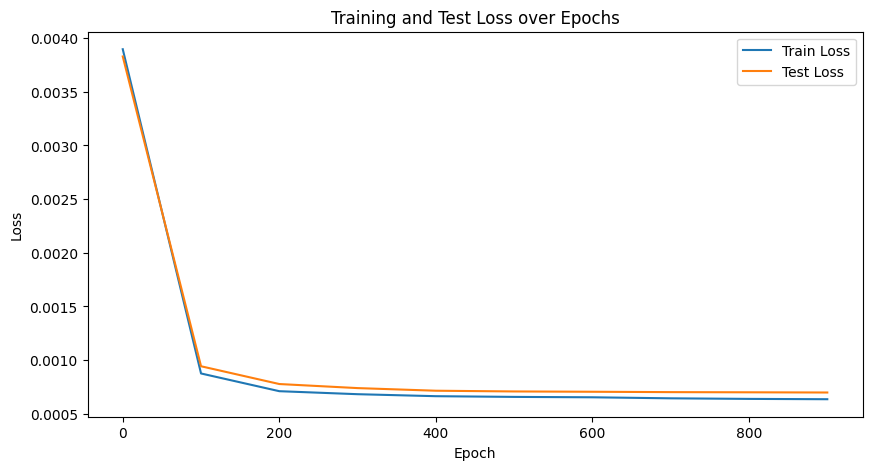

In [142]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, epochs, 100), total_train_loss, label='Train Loss')
plt.plot(range(0, epochs, 100), total_test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()

# Save the model

In [143]:
torch.save(model1.state_dict(),'prototype.pth')

In [144]:
mse = mean_squared_error(ytest,test_pred)
print(f'mse loss: {mse}')

ValueError: ignored